Question 1: What is Simple Linear Regression?

  - Simple Linear Regression (SLR) is a statistical technique that models the relationship between a dependent variable (Y) and a single independent variable (X) using a straight line.
  - The model assumes this relationship:

Y=β
0
​
 +β
1
​
 X+ε
  - Where:
β₀ = intercept
β₁ = slope (rate of change of Y with respect to X)
ε = error term

Question 2: What are the key assumptions of Simple Linear Regression?

  - Linearity – The relationship between X and Y is linear.
Independence – Observations are independent of each other.
Homoscedasticity – Constant variance of errors (no pattern in residuals).
Normality of errors – The residuals are normally distributed.
No multicollinearity – (Not applicable for simple regression; relevant in multiple regression.)

Question 3: What is heteroscedasticity, and why is it important to address?

  - Heteroscedasticity occurs when the variance of residuals (errors) is not constant across all levels of X.
  - Example: Residuals spread increases as X increases.
  - Why it’s important:
It violates the homoscedasticity assumption.
Leads to inefficient estimates and incorrect hypothesis tests (wrong p-values).
Solution:
Use log transformation, weighted least squares, or robust standard errors.

Question 4: What is Multiple Linear Regression?

  - Multiple Linear Regression (MLR) models the relationship between one dependent variable and two or more independent variables:

  - Y=β
0
​
 +β
1
​
 X
1
​
 +β
2
​
 X
2
​
 +…+β
n
​
 X
n
​
 +ε
  - It helps analyze how multiple predictors jointly affect the target variable.

Question 5: What is Polynomial Regression, and how does it differ from Linear Regression?

  - Polynomial Regression is a type of regression that models the relationship between X and Y as an nth-degree polynomial:

  - Y=β
0
​
 +β
1
​
 X+β
2
​
 X
2
 +β
3
​
 X
3
 +…+ε
  - Difference:
Linear regression fits a straight line.
Polynomial regression fits a curved line to capture nonlinear relationships.

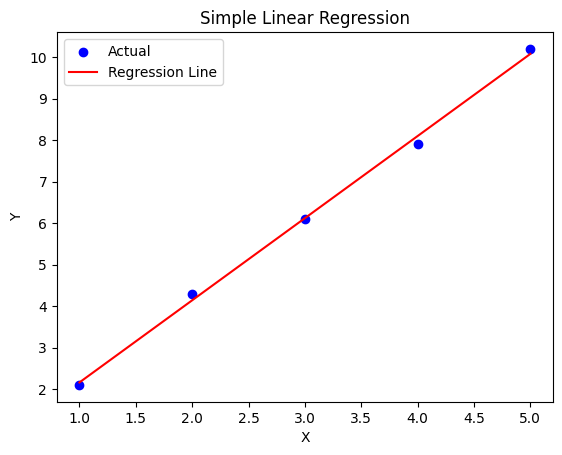

Intercept: 0.17999999999999794
Slope: 1.9800000000000004


In [1]:
#Question 6: Implement a Python program to fit a Simple Linear Regression model to
#the following sample data:

# - X = [1, 2, 3, 4, 5]

 # - Y = [2.1, 4.3, 6.1, 7.9, 10.2]
#Plot the regression line over the data points.


import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Data
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
Y = np.array([2.1, 4.3, 6.1, 7.9, 10.2])

# Model
model = LinearRegression()
model.fit(X, Y)

# Predictions
Y_pred = model.predict(X)

# Plot
plt.scatter(X, Y, color='blue', label='Actual')
plt.plot(X, Y_pred, color='red', label='Regression Line')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Simple Linear Regression')
plt.legend()
plt.show()

print("Intercept:", model.intercept_)
print("Slope:", model.coef_[0])


In [2]:
#Question 7: Multiple Linear Regression + Multicollinearity (VIF)

import pandas as pd
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Data
data = pd.DataFrame({
    'Area': [1200, 1500, 1800, 2000],
    'Rooms': [2, 3, 3, 4],
    'Price': [250000, 300000, 320000, 370000]
})

X = data[['Area', 'Rooms']]
y = data['Price']

# Fit model
model = LinearRegression()
model.fit(X, y)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# Calculate VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)


#✅ Interpretation:
#If VIF > 5 or 10, strong multicollinearity exists → drop or combine variables.

Coefficients: [   63.15789474 34736.84210526]
Intercept: 103157.89473684214
  Feature         VIF
0    Area  127.796923
1   Rooms  127.796923


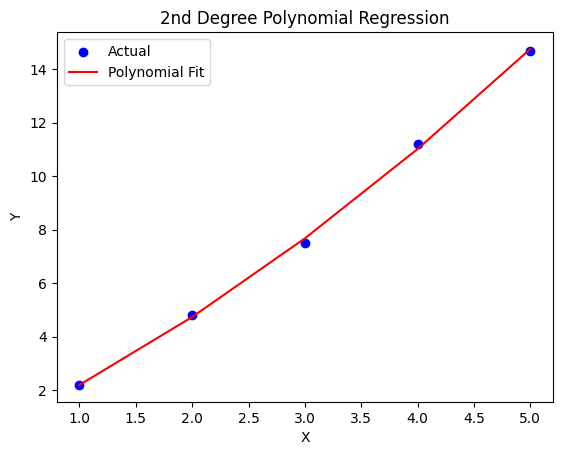

In [3]:
#Question 8: Polynomial Regression

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Data
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
Y = np.array([2.2, 4.8, 7.5, 11.2, 14.7])

# Polynomial Features
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Model
model = LinearRegression()
model.fit(X_poly, Y)
Y_pred = model.predict(X_poly)

# Plot
plt.scatter(X, Y, color='blue', label='Actual')
plt.plot(X, Y_pred, color='red', label='Polynomial Fit')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('2nd Degree Polynomial Regression')
plt.legend()
plt.show()


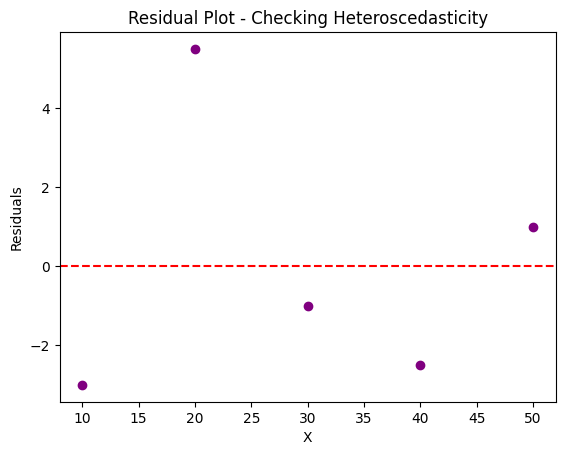

In [4]:
#Question 9: Residual Plot to Check Heteroscedasticity

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Data
X = np.array([10, 20, 30, 40, 50]).reshape(-1, 1)
Y = np.array([15, 35, 40, 50, 65])

# Model
model = LinearRegression()
model.fit(X, Y)
Y_pred = model.predict(X)

# Residuals
residuals = Y - Y_pred

# Plot Residuals
plt.scatter(X, residuals, color='purple')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('X')
plt.ylabel('Residuals')
plt.title('Residual Plot - Checking Heteroscedasticity')
plt.show()


#Interpretation:
#If residuals spread increases or decreases with X → heteroscedasticity exists.
#If residuals are randomly scattered → assumption holds.


Question 10: Handling Heteroscedasticity & Multicollinearity in Real Estate Model
  - Scenario: Predict house prices using area, rooms, and location.
 - Steps:
 - To fix Heteroscedasticity:
Apply log transformation (e.g., log(price) or log(area)).
Use Weighted Least Squares (WLS) or Robust Regression.
Check residual plots again after correction.
 - To fix Multicollinearity:
Compute VIF for all predictors.
 - If VIF > 5:
Remove one of the correlated features.
Combine them (e.g., create average or ratio).
Use Principal Component Regression (PCR) or Ridge/Lasso regression.
 - Goal:
Ensure stable coefficients, valid predictions, and a robust regression model.